# Nitrogen Labs Analysis
This notebook contains code for a lab experiment of finding the latent heat of liquid nitrogen. Data is read in from a csv file (not included in GitHub) and split up and plotted with errorbars. Averages of the data and lines of best fit are then used to analyse the data I had measured. This was done in year 1 of university.

In [1]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import astropy.units as u

# Rough code

In [2]:
datafile = 'Nitrogen_Data.csv'
data = np.genfromtxt(datafile, skip_header=1, delimiter=',', unpack=True)
data

array([[0.0000e+00, 2.5000e+00, 5.0000e+00, 7.5000e+00, 1.0000e+01,
        1.2500e+01, 1.5000e+01, 1.7500e+01, 2.0000e+01, 2.2500e+01,
        2.5000e+01, 2.7500e+01, 3.0000e+01, 3.2500e+01, 3.5000e+01,
        3.7500e+01, 4.0000e+01, 4.2500e+01, 4.5000e+01, 4.7500e+01,
        5.0000e+01, 5.2500e+01, 5.5000e+01, 5.7500e+01, 6.0000e+01,
        6.2500e+01, 6.5000e+01, 6.7500e+01, 7.0000e+01, 7.2500e+01,
        7.5000e+01, 7.7500e+01, 8.0000e+01, 8.2500e+01, 8.5000e+01,
        8.7500e+01, 9.0000e+01, 9.2500e+01, 9.5000e+01],
       [3.4053e+02, 3.3419e+02, 3.2901e+02, 3.2425e+02, 3.2004e+02,
        3.1610e+02, 3.1227e+02, 3.0855e+02, 3.0491e+02, 3.0129e+02,
        2.9745e+02, 2.9374e+02, 2.9040e+02, 2.8706e+02, 2.8390e+02,
        2.8075e+02, 2.7748e+02, 2.6964e+02, 2.6206e+02, 2.5538e+02,
        2.4870e+02, 2.4214e+02, 2.3572e+02, 2.2934e+02, 2.2308e+02,
        2.1682e+02, 2.1073e+02, 2.0468e+02, 1.9871e+02, 1.9646e+02,
        1.9434e+02, 1.9217e+02, 1.8998e+02, 1.8777e+02, 1.8

In [3]:
a, b, c, d, e = data

In [4]:
time = a*u.min
mass = b*u.g
volt = c*u.V

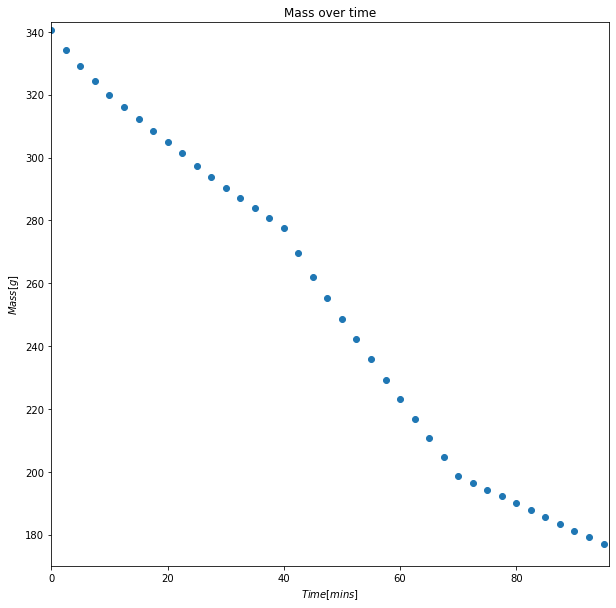

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.set_xlabel('$Time [mins]$')
ax.set_ylabel('$Mass [g]$')
ax.set_xlim(0,96)
ax.set_ylim(170,343)
ax.set_title('Mass over time', fontsize = 12)
ax.scatter(time, mass)

In [6]:
np.nanmean(volt)

<Quantity 3.42982308 V>

In [7]:
#r = 1.38*(u.g/u.min)

In [8]:
#r.si

In [9]:
#r.to(u.kg/u.min)

In [10]:
rs = []
for i in range(0,len(time)-1):
    rs += {-((mass[i+1]-mass[i])/(time[i+1]-time[i])).value}
rs

[2.53599999999999,
 2.0720000000000027,
 1.9039999999999964,
 1.6839999999999917,
 1.5759999999999992,
 1.5320000000000165,
 1.4879999999999882,
 1.4559999999999946,
 1.4480000000000017,
 1.5360000000000127,
 1.4839999999999918,
 1.3360000000000127,
 1.33599999999999,
 1.26400000000001,
 1.259999999999991,
 1.3079999999999927,
 3.1360000000000126,
 3.031999999999994,
 2.672000000000003,
 2.672000000000003,
 2.624000000000001,
 2.567999999999995,
 2.5519999999999983,
 2.5039999999999965,
 2.5040000000000076,
 2.4360000000000013,
 2.4199999999999933,
 2.3879999999999995,
 0.9,
 0.8480000000000019,
 0.8680000000000063,
 0.8759999999999991,
 0.8839999999999918,
 0.8680000000000063,
 0.8799999999999955,
 0.8720000000000028,
 0.8519999999999982,
 0.8720000000000028]

In [11]:
#rs*u.kg/u.s

In [12]:
len(time)
len(rs)

38

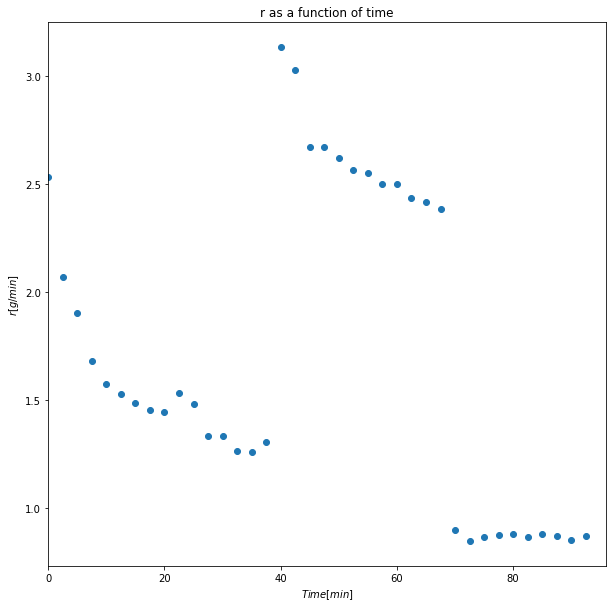

In [13]:
fig2 = plt.figure(figsize=(10,10))
ax2 = fig2.add_subplot()
ax2.set_xlabel('$Time [min]$')
ax2.set_ylabel('$r [g/min]$')
ax2.set_xlim(0,96)
#ax2.set_ylim(1.3e-5,5.5e-5)
ax2.set_title('r as a function of time', fontsize = 12)
ax2.scatter(time[0:38], rs)

# For use in the report

Splitting the data into the individual stages for plotting

In [14]:
def straightline(m,x,c):
    """Returns the y value for a straight line with inputs:
    x coordinate (x)
    gradient (m)
    y-intercept (c)"""
    y = m*x+c
    return y

In [15]:
datafile = 'Nitrogen_Data.csv'
data = np.genfromtxt(datafile, skip_header=1, delimiter=',', unpack=True)
data

array([[0.0000e+00, 2.5000e+00, 5.0000e+00, 7.5000e+00, 1.0000e+01,
        1.2500e+01, 1.5000e+01, 1.7500e+01, 2.0000e+01, 2.2500e+01,
        2.5000e+01, 2.7500e+01, 3.0000e+01, 3.2500e+01, 3.5000e+01,
        3.7500e+01, 4.0000e+01, 4.2500e+01, 4.5000e+01, 4.7500e+01,
        5.0000e+01, 5.2500e+01, 5.5000e+01, 5.7500e+01, 6.0000e+01,
        6.2500e+01, 6.5000e+01, 6.7500e+01, 7.0000e+01, 7.2500e+01,
        7.5000e+01, 7.7500e+01, 8.0000e+01, 8.2500e+01, 8.5000e+01,
        8.7500e+01, 9.0000e+01, 9.2500e+01, 9.5000e+01],
       [3.4053e+02, 3.3419e+02, 3.2901e+02, 3.2425e+02, 3.2004e+02,
        3.1610e+02, 3.1227e+02, 3.0855e+02, 3.0491e+02, 3.0129e+02,
        2.9745e+02, 2.9374e+02, 2.9040e+02, 2.8706e+02, 2.8390e+02,
        2.8075e+02, 2.7748e+02, 2.6964e+02, 2.6206e+02, 2.5538e+02,
        2.4870e+02, 2.4214e+02, 2.3572e+02, 2.2934e+02, 2.2308e+02,
        2.1682e+02, 2.1073e+02, 2.0468e+02, 1.9871e+02, 1.9646e+02,
        1.9434e+02, 1.9217e+02, 1.8998e+02, 1.8777e+02, 1.8

In [16]:
a, b, c, d, e = data
time = a*u.min
mass = b*u.g
volt = c*u.V
t_err = d*u.min
m_err = e*u.g

In [17]:
time1 = time[0:7] 
mass1 = mass[0:7]

time2 = time[7:17] 
mass2 = mass[7:17]

time3 = time[17:29] 
mass3 = mass[17:29]

time4 = time[29:39] 
mass4 = mass[29:39]

#mass1, mass2, mass3, mass4

In [18]:
time1

<Quantity [ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. ] min>

In [19]:
mass1

<Quantity [340.53, 334.19, 329.01, 324.25, 320.04, 316.1 , 312.27] g>

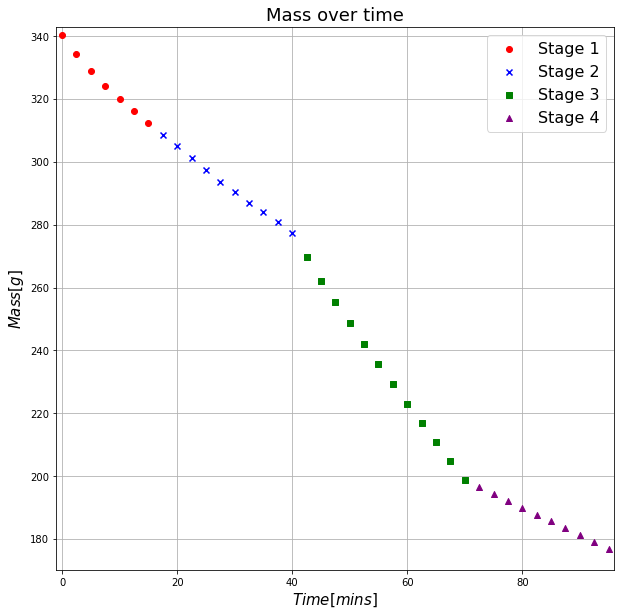

In [20]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.grid(visible=True)
ax.set_xlabel('$Time [mins]$', fontsize=15)
ax.set_ylabel('$Mass [g]$', fontsize=15)
ax.set_xlim(-1,96)
ax.set_ylim(170,343)
ax.set_title('Mass over time', fontsize = 18)
ax.scatter(time1, mass1, color='red', marker='o', label='Stage 1', zorder=5)
ax.scatter(time2, mass2, color='blue', marker='x', label='Stage 2', zorder=5)
ax.scatter(time3, mass3, color='green', marker='s', label='Stage 3', zorder=5)
ax.scatter(time4, mass4, color='purple', marker='^', label='Stage 4', zorder=5)
ax.legend(loc='upper right', fontsize=16)

Plots of the stages individually

<ErrorbarContainer object of 3 artists>

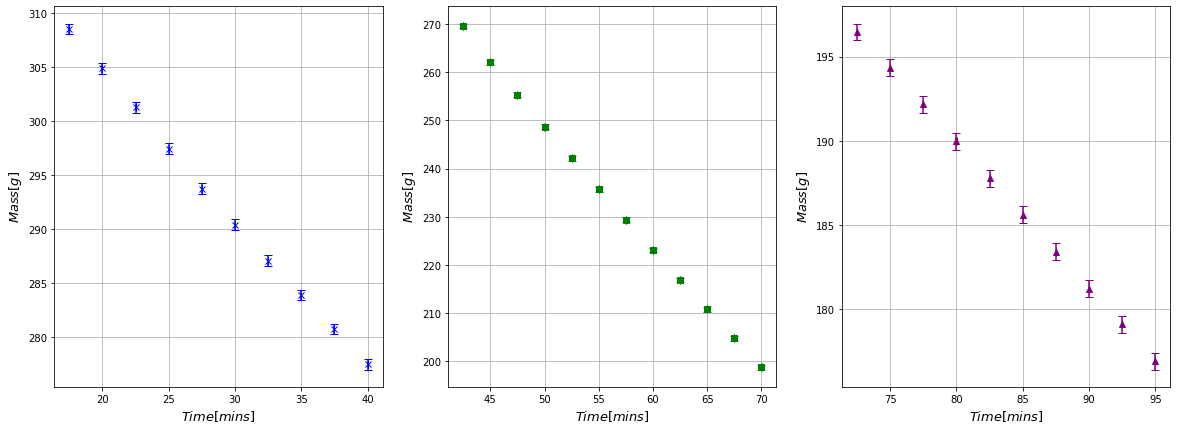

In [21]:
fig2, axs = plt.subplots(1,3, figsize=(20,7))
axs[0].grid(visible=True), axs[1].grid(visible=True), axs[2].grid(visible=True)
axs[0].set_xlabel('$Time [mins]$', fontsize=13), axs[0].set_ylabel('$Mass [g]$', fontsize=13)
axs[1].set_xlabel('$Time [mins]$', fontsize=13), axs[1].set_ylabel('$Mass [g]$', fontsize=13)
axs[2].set_xlabel('$Time [mins]$', fontsize=13), axs[2].set_ylabel('$Mass [g]$', fontsize=13)
#axs[0].scatter(time2, mass2, color='blue', marker='x', zorder=5, label='Stage 2 Data')
#axs[1].scatter(time3, mass3, color='green', marker='s', zorder=5, label='Stage 3 Data')
#axs[2].scatter(time4, mass4, color='purple', marker='^', zorder=5, label='Stage 4 Data')
axs[0].errorbar(time2, mass2, yerr=m_err[7:17], xerr=t_err[7:17], color='blue', marker='x', capsize=4, linestyle='', zorder=5, label='Stage 2 Data')
axs[1].errorbar(time3, mass3, yerr=m_err[17:29], xerr=t_err[17:29], color='green', marker='s', capsize=4, linestyle='', zorder=5, label='Stage 3 Data')
axs[2].errorbar(time4, mass4, yerr=m_err[29:39], xerr=t_err[29:39], color='purple', marker='^', capsize=4, linestyle='', zorder=5, label='Stage 4 Data')

In [22]:
ax.errorbar?

In [23]:
initial_guess = (1,1)
xvals2 = np.linspace(15,40,101)
xvals3 = np.linspace(40,70,101)
xvals4 = np.linspace(70,95,101)

In [24]:
bestfit2, cov2 = curve_fit(straightline, time2, mass2, initial_guess, sigma=m_err[7:17], absolute_sigma=True)
bestfit2, cov2

(array([ -1.38232727, 332.29490909]),
 array([[ 0.00048485, -0.01393939],
        [-0.01393939,  0.42575757]]))

In [25]:
bestfit3, cov3 = curve_fit(straightline, time3, mass3, initial_guess, sigma=m_err[17:29], absolute_sigma=True)
bestfit3, cov3

(array([ -2.56246154, 377.22179479]),
 array([[ 2.79720301e-04, -1.57342670e-02],
        [-1.57342670e-02,  9.05885850e-01]]))

In [26]:
bestfit4, cov4 = curve_fit(straightline, time4, mass4, initial_guess, sigma=m_err[29:39], absolute_sigma=True)
bestfit4, cov4

(array([ -0.87117576, 259.6549697 ]),
 array([[ 4.84848401e-04, -4.06060537e-02],
        [-4.06060537e-02,  3.42575701e+00]]))

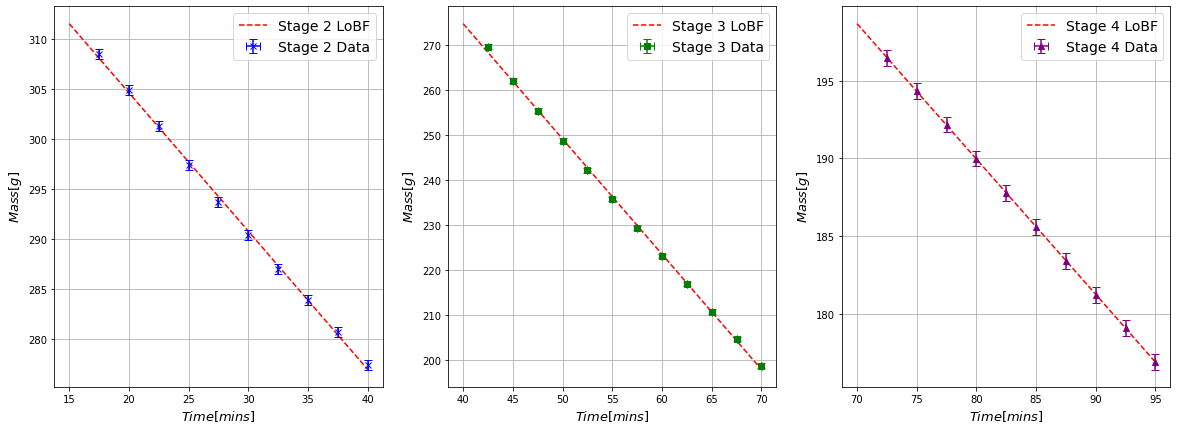

In [27]:
axs[0].plot(xvals2, straightline(bestfit2[0],xvals2,bestfit2[1]), linestyle='--', color='red', label='Stage 2 LoBF')
axs[1].plot(xvals3, straightline(bestfit3[0],xvals3,bestfit3[1]), linestyle='--', color='red', label='Stage 3 LoBF')
axs[2].plot(xvals4, straightline(bestfit4[0],xvals4,bestfit4[1]), linestyle='--', color='red', label='Stage 4 LoBF')
axs[0].legend(loc='upper right', fontsize=14), axs[1].legend(loc='upper right', fontsize=14), axs[2].legend(loc='upper right', fontsize=14)
fig2

In [28]:
# Variance in the gradient is cov[0,0] so the uncertainty is (cov[0,0])^0.5
r2unc = (cov2[0,0])**0.5
r3unc = (cov3[0,0])**0.5
r4unc = (cov4[0,0])**0.5
print(f'Rate of vaporisation for stage 2: {-bestfit2[0]*u.g/u.min:.3f} with uncertainty: +/-{r2unc:.3f}')
print(f'Rate of vaporisation for stage 3: {-bestfit3[0]*u.g/u.min:.3f} with uncertainty: +/-{r3unc:.3f}')
print(f'Rate of vaporisation for stage 4: {-bestfit4[0]*u.g/u.min:.3f} with uncertainty: +/-{r4unc:.3f}')

Rate of vaporisation for stage 2: 1.382 g / min with uncertainty: +/-0.022
Rate of vaporisation for stage 3: 2.562 g / min with uncertainty: +/-0.017
Rate of vaporisation for stage 4: 0.871 g / min with uncertainty: +/-0.022


Rate of vaporisation due to joule heating

In [29]:
# Subtract the average of r2 and r4 from r3
rj = -bestfit3[0]-(-bestfit2[0]+(-bestfit4[0]))/2
rj

1.4357100218648005

In [30]:
# Calculating errors on rj
# Error in avg of r2 and r4
avg_err = (r2unc**2+r4unc**2)**0.5
# Error in rj
rj_perr = ((avg_err/(-bestfit2[0]+(-bestfit4[0]))*100)**2+(r3unc/bestfit3[0]*100)**2)
rj_err = rj_perr/100*rj
print(f'Rate of vaporisation due to joule heating: {rj*u.g/u.min:.3f} with uncertainty: +/-{rj_err:.3f}')

Rate of vaporisation due to joule heating: 1.436 g / min with uncertainty: +/-0.034


$$ P = IV $$
* $I$ = 1.5A

In [31]:
# Calculating mean voltage in stage 3
V_avg = np.nanmean(volt)
V_avg

<Quantity 3.42982308 V>

In [32]:
# Average power
P_avg = (1.5*u.A)*V_avg
P_avg.to(u.W)

<Quantity 5.14473462 W>

$$ L = {P\over{r}} $$

In [33]:
L_n = P_avg/(rj*u.g/u.min)
Ln = L_n.to(u.kJ/u.kg)
Ln

<Quantity 215.0044732 kJ / kg>

In [34]:
volt[17:29].std(ddof=1)

<Quantity 0.00806355 V>

In [35]:
# Calculating errors on Ln
# Error on avg power = Propagation of error on mean and reading error of voltage
P_errmean = (volt[17:29].std(ddof=1)/(12)**0.5).value
print(P_errmean)
P_readerr = 0.005

0.002327746287243902


In [36]:
P_err = (P_errmean**2+P_readerr**2)**0.5
P_err
print(f'Average Power: {P_avg.to(u.W):.3f} with uncertainty: +/-{P_err:.3f}')

Average Power: 5.145 W with uncertainty: +/-0.006


In [37]:
rj_si = (rj*u.g/u.min).si.value
rj_si

2.3928500364413343e-05

In [38]:
(rj*(u.g/u.min)).si

<Quantity 2.39285004e-05 kg / s>

In [39]:
# rj_err in si units
rj_err_si = (rj_err*u.g/u.min).si.value
rj_err_si
# Error on Ln
Ln_err = ((P_err/P_avg.value*100)**2+(rj_err_si/rj_si)**2)**0.5*1000
Ln_err

109.71712956691992

In [40]:
print(f'Latent Heat of Nitrogen: {Ln:.3f} with uncertainty: +/-{Ln_err:.3f}')

Latent Heat of Nitrogen: 215.004 kJ / kg with uncertainty: +/-109.717


$$ r_i = -{m_{i+1}-m_i\over{t_{i+1}-t_i}}$$

Error on $r_i$:
$$ \sqrt{\sum_{i=1}^{n}\left(\left({\partial r_i \over{\partial m_{i+1}}} \sigma_{m_{i+1}} \right)^2 + \left({\partial r_i \over{\partial m_i}} \sigma_{m_i} \right)^2 + \left({\partial r_i \over{\partial t_{i+1}}} \sigma_{t_{i+1}} \right)^2 + \left({\partial r_i \over{\partial t_i}} \sigma_{t_i} \right)^2\right)} $$

Simplifies to:
$$ \sqrt{\sum_{i=1}^{n}\left(\sigma_{m_{i+1}}^2 +\sigma_{m_i}^2 + 2r_i^2(\sigma_{t_{i+1}}^2 + \sigma_{t_i}^2) \over{(t_{i+1}-t_i)^2} \right)} $$

In [41]:
#ri = -(mass2[i+1]-mass2[i])/(time2[i+1]-time2[i])

In [42]:
#tempr = (m_err[i+1]**2+m_err[i]**2+2*ri**2(t_err[i+1]**2+t_err[i]**2))/(time[i+1]-time[i])**2

In [43]:
temp_err = 0
for i in range(0,len(time)-1):
    temp_err += (m_err[i+1]**2+m_err[i]**2+2*(-(mass[i+1]-mass[i])/(time[i+1]-time[i]))**2*(t_err[i+1]**2+t_err[i]**2))/(time[i+1]-time[i])**2
ri_err = (temp_err)**0.5/(len(time)-1)
ri_err

<Quantity 0.04589011 g / min>

Or:

Error on numerator:
$$ \sqrt{\left(\sigma_{m_{i+1}}\right)^2 + \left(\sigma_{m_i}\right)^2} $$

Error on denominator:
$$ \sqrt{\left(\sigma_{t_{i+1}}\right)^2 + \left(\sigma_{t_i}\right)^2} $$

Together:
$$ \sqrt{\left(\delta_{num}\right)^2 + \left(\delta_{den}\right)^2} $$
Where $\delta$ represents the percentage error

In [44]:
rs = []
for i in range(0,len(time)-1):
    rs += {-((mass[i+1]-mass[i])/(time[i+1]-time[i])).value}
#rs

In [45]:
rs1 = rs[0:7]
rs2 = rs[7:17]
rs3 = rs[17:29]
rs4 = rs[29:38]

In [46]:
# Stage 2
avg_r2 = np.array(rs2[1:9]).sum()/len(rs2[1:9])
# Stage 3
avg_r3 = np.array(rs3[2:10]).sum()/len(rs3[2:10])
# Stage 4
avg_r4 = np.array(rs4[1:]).sum()/len(rs4[1:])

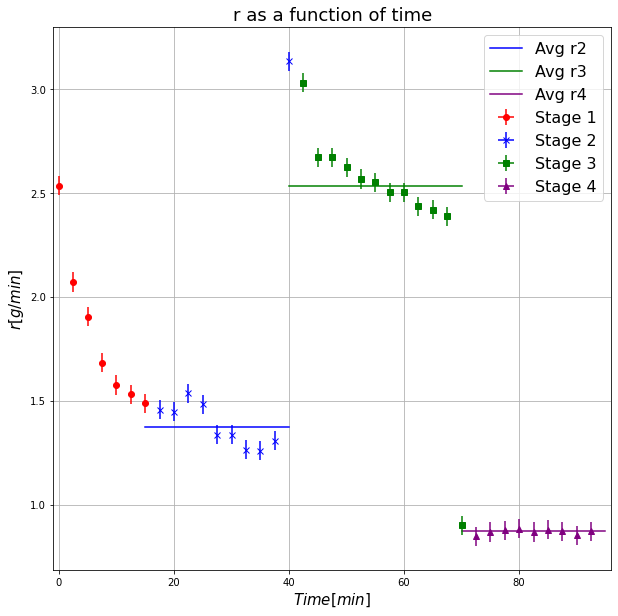

In [47]:
fig3 = plt.figure(figsize=(10,10))
ax3 = fig3.add_subplot()
ax3.grid(visible=True)
ax3.set_xlabel('$Time [min]$', fontsize=15)
ax3.set_ylabel('$r [g/min]$', fontsize=15)
ax3.set_xlim(-1,96)
ax3.set_title('r as a function of time', fontsize = 18)
ax3.errorbar(time1.value, rs1, yerr=ri_err.value, xerr=t_err[0:7].value, color='red', marker='o', linestyle='', label='Stage 1', zorder=5)
ax3.errorbar(time2.value, rs2, yerr=ri_err.value, xerr=t_err[7:17].value, color='blue', marker='x', linestyle='', label='Stage 2', zorder=5)
ax3.errorbar(time3.value, rs3, yerr=ri_err.value, xerr=t_err[17:29].value, color='green', marker='s', linestyle='', label='Stage 3', zorder=5)
ax3.errorbar(time4[:9].value, rs4, yerr=ri_err.value, xerr=t_err[29:38].value, color='purple', marker='^', linestyle='', label='Stage 4', zorder=5)
ax3.plot(xvals2,straightline(0,xvals2,avg_r2),color='blue', label='Avg r2')
ax3.plot(xvals3,straightline(0,xvals3,avg_r3),color='green', label='Avg r3')
ax3.plot(xvals4,straightline(0,xvals4,avg_r4),color='purple', label='Avg r4')
ax3.legend(loc='upper right', fontsize=16)

In [48]:
# Subtract the average of r2 and r4 from r3
r_joule = avg_r3-(avg_r2+avg_r4)/2
r_joule

1.413499999999999

In [49]:
# Error on r_joule
# Error in avg of r2 and r4
avgerr = (ri_err**2+ri_err**2)**0.5
# Error in r_joule
rJ_perr = (((avgerr/(avg_r2+avg_r4))*100)**2+(ri_err/avg_r3*100)**2)**0.5
rJ_err = rJ_perr/100*r_joule
print(f'Rate of vaporisation due to joule heating: {r_joule*u.g/u.min:.3f} with uncertainty: +/-{rJ_err:.3f}')

Rate of vaporisation due to joule heating: 1.413 g / min with uncertainty: +/-0.048 g / min


$$ L = {P\over{r}} $$

In [72]:
L = P_avg/(r_joule*u.g/u.min)
print(L.to(u.J/u.kg))
L.to(u.kJ/u.kg)

218382.7923049714 J / kg


<Quantity 218.3827923 kJ / kg>

In [51]:
# Error on L
P_err

0.005515288095628167

In [52]:
rJ_si = (r_joule*u.g/u.min).si
rJ_si

<Quantity 2.35583333e-05 kg / s>

In [53]:
(P_err/P_avg.value*100)**2

0.01149239254930086

In [73]:
# rJ_err in si units
rJ_err_si = (rJ_err*u.g/u.min).si.value
#print(rJ_err_si)
# Error on Ln
L_err = ((P_err/P_avg.value*100)**2+(rJ_err_si/rJ_si).value**2)**0.5*1000
L_err

107.20257715943417

In [68]:
(P_err/P_avg.value*100)**2

0.01149239254930086

In [69]:
(rJ_err_si/rJ_si).value**2

3.2357408401000417e-13

In [64]:
P_avg

<Quantity 5.14473462 A V>

In [61]:
print(f'Latent Heat of Nitrogen: {L.to(u.kJ/u.kg):.3f} with uncertainty: +/-{L_err:.3f}')

Latent Heat of Nitrogen: 218.383 kJ / kg with uncertainty: +/-107.203


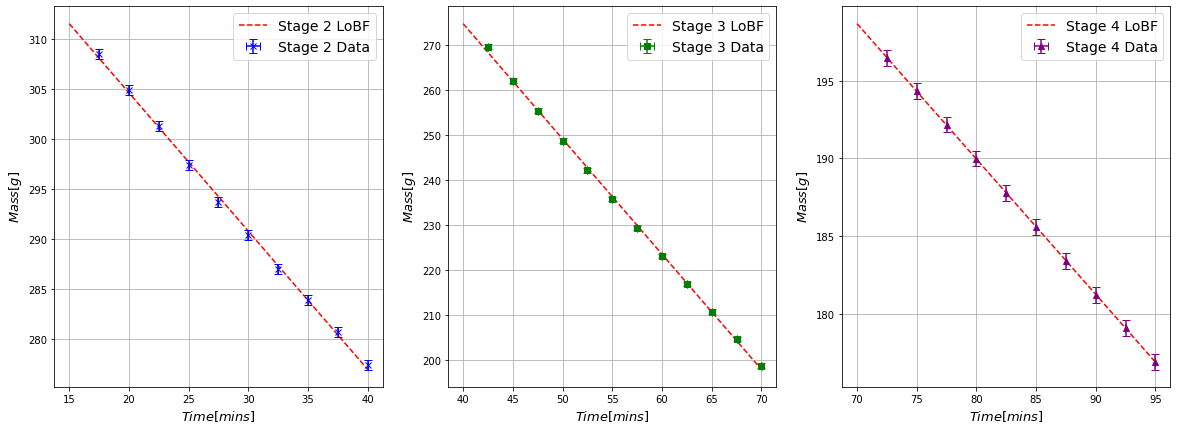

In [57]:
fig2

In [58]:
#fig.savefig('Mass_per_time.png', dpi=300)
fig2.savefig('Mpt_separated.png', dpi=300)
#fig3.savefig('r_func_time.png', dpi=300)